In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mplt
from matplotlib import rcParams
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import rc
import matplotlib.colors as colors
import cartopy.io.shapereader as shpreader

rc('mathtext', default='regular') 
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'serif'
rcParams['font.size'] = 12
import geopandas as gpd
import cmasher as cmr

zips = gpd.read_file('../Data/tl_2010_35_zcta510/tl_2010_35_zcta510.shp')
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
new_cmap = truncate_colormap(cmr.torch_r, .03, 1)

In [5]:
allbf = pd.read_csv('../Data/smoke/BonneZip/bigPurpleAirZip_os.csv')
allbf['Date'] = pd.to_datetime(allbf['Date'])
allbf= allbf.rename(columns = {'Zip':'ZCTA5CE10', 'smokepm25': 'BFsmokepm25', 'totalpm25': 'BFtotalpm25'})
allbf['ZCTA5CE10'] = allbf['ZCTA5CE10'].astype('int')

kate = pd.read_csv('../Data/smoke/KateZip/AllZipSmoke_Total_os.csv')
kate['Date'] = pd.to_datetime(kate['Date'], format = '%Y-%m-%d')
kate = kate.rename(columns = {'Zip':'ZCTA5CE10', 'smokepm25': 'KATEsmokepm25', 'totalpm25': 'KATEtotalpm25'})
kate['ZCTA5CE10'] = kate['ZCTA5CE10'].astype('int')

kamal = pd.read_csv('../Data/smoke/KamalZip/Kamal_average_reformat_all_OS.csv')
kamal['Date'] = pd.to_datetime(kamal['Date'])
kamal = kamal.rename(columns = {'Zip':'ZCTA5CE10', 'smokepm25': 'KAMALsmokepm25', 'totalpm25': 'KAMALtotalpm25', 'maxsmokepm25': 'KAMALmaxsmokepm25', 'maxtotalpm25': 'KAMALmaxtotalpm25'})
kamal['ZCTA5CE10'] = kamal['ZCTA5CE10'].astype('int')

kamalMAX = pd.read_csv('../Data/smoke/KamalZip/Kamal_max_reformat_all_OS.csv')
kamalMAX['Date'] = pd.to_datetime(kamalMAX['Date'])
kamalMAX = kamalMAX.rename(columns = {'Zip':'ZCTA5CE10', 'smokepm25': 'KAMALsmokepm25', 'totalpm25': 'KAMALtotalpm25', 'maxsmokepm25': 'KAMALmaxsmokepm25', 'maxtotalpm25': 'KAMALmaxtotalpm25'})
kamalMAX['ZCTA5CE10'] = kamalMAX['ZCTA5CE10'].astype('int')

In [6]:
merge1 = pd.merge(allbf, kate, on = ['Date', 'ZCTA5CE10'])
merge2 = pd.merge(merge1, kamal, on = ['Date', 'ZCTA5CE10'])
merge2 = merge2.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], axis = 1)
merge3 = pd.merge(merge2, kamalMAX, on = ['Date', 'ZCTA5CE10'])
merge3 = merge3.drop(['Unnamed: 0'], axis = 1)

In [7]:
merge3['ZCTA5CE10'] = merge3['ZCTA5CE10'].astype('str')
final = zips.merge(merge3, on = 'ZCTA5CE10')

In [13]:
date = '2022-04-29'

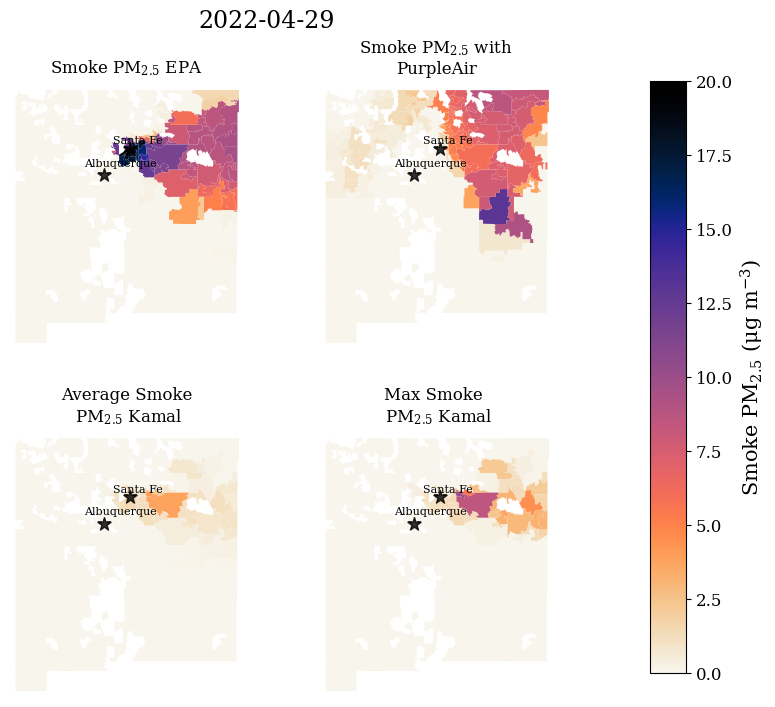

In [14]:
titles = ['Smoke PM$_{2.5}$ EPA', 'Smoke PM$_{2.5}$ with \nPurpleAir', 'Average Smoke\n PM$_{2.5}$ Kamal', 'Max Smoke \n PM$_{2.5}$ Kamal']
fig, axs = plt.subplots(ncols=2,nrows=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,8),
                        gridspec_kw = {'wspace':-.5, 'hspace':.3})
norm = colors.Normalize(vmin = 0, vmax= 20)
cbar = plt.cm.ScalarMappable(norm=norm, cmap=new_cmap)
axs=axs.flatten()
plt.suptitle(date, fontsize = 17, y = .97)
oneday = merge3[merge3['Date'].dt.strftime('%Y-%m-%d') == date]
onedayZIPS = zips.merge(oneday, on = 'ZCTA5CE10')
for i in range(0,4):
        axs[i].set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
        if (i == 0):
            cs =onedayZIPS.plot(column = 'KATEsmokepm25', ax = axs[i], cmap = new_cmap, legend = False, vmin = 0, vmax = 20)
        elif (i == 1):
            onedayZIPS.plot(column = 'BFsmokepm25', ax = axs[i], cmap = new_cmap, legend = False, vmin = 0, vmax = 20)
        elif (i == 2):
            onedayZIPS.plot(column = 'KAMALsmokepm25_x', ax = axs[i], cmap = new_cmap, legend = False, vmin = 0, vmax = 20)
        elif (i == 3):
            onedayZIPS.plot(column = 'KAMALsmokepm25_y', ax = axs[i], cmap = new_cmap, legend = False, vmin = 0, vmax = 20)
            cb_ax = fig.add_axes([.82,.14,.03,.74])
            ax_cbar = fig.colorbar(cbar, ax=axs[i], shrink = .8, cax = cb_ax, orientation = 'vertical')
            ax_cbar.set_label('Smoke PM$_{2.5}$ ($\mu$g m$^{-3}$)', fontsize = 15)

        axs[i].scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
        axs[i].annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
        axs[i].scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
        axs[i].annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
        axs[i].axis('off')
        axs[i].set_title(titles[i], fontsize = 12)
